In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn



In [133]:
news = pd.read_csv("C:/Users/antoi/Desktop/Projektrealisierung-2/notebooks für das Trainieren der Klassifikation und Zusammenfassung/Trainings und Testdaten/ergbnisse/test_news_neu.csv")
science = pd.read_csv("C:/Users/antoi/Desktop/Projektrealisierung-2/notebooks für das Trainieren der Klassifikation und Zusammenfassung/Trainings und Testdaten/ergbnisse/test_science.csv")
science_neu = pd.read_csv("C:/Users/antoi/Desktop/Projektrealisierung-2/notebooks für das Trainieren der Klassifikation und Zusammenfassung/Trainings und Testdaten/ergbnisse/test_science_neu.csv")
review = pd.read_csv("C:/Users/antoi/Desktop/Projektrealisierung-2/notebooks für das Trainieren der Klassifikation und Zusammenfassung/Trainings und Testdaten/ergbnisse/test_review_text.csv")
story = pd.read_csv("C:/Users/antoi/Desktop/Projektrealisierung-2/notebooks für das Trainieren der Klassifikation und Zusammenfassung/Trainings und Testdaten/ergbnisse/test_story_neu.csv")

In [16]:
news.columns

Index(['Unnamed: 0', 'text_rank_text', 'token_text_rank', 'Zusammenfassung',
       'länge Zusammenfassung', 'text', 'tokens_gesamt',
       'desired_compression_rate', 'ent_com_rate', 'ent_com_rate_neu'],
      dtype='object')

In [98]:
df = pd.concat([news,science,review,story])[['text_rank_text', 'token_text_rank', 'Zusammenfassung',
       'länge Zusammenfassung', 'text', 'tokens_gesamt',
       'desired_compression_rate', 'ent_com_rate', 'ent_com_rate_neu']]

In [99]:
df = df.reset_index()

In [33]:
df

,index,text_rank_text,token_text_rank,Zusammenfassung,länge Zusammenfassung,text,tokens_gesamt,desired_compression_rate,ent_com_rate,ent_com_rate_neu,Bereich,Bereich_Num
0,0,RJD Chief Lalu Prasad Yadav on Wednesday said ...,31,RJD Chief Lalu Prasad Yadav on Wednesday said ...,31,RJD Chief Lalu Prasad Yadav on Wednesday said ...,58,0.54,0.534483,0.534483,Zwischen,1
1,1,The Indira Gandhi International Airport has cl...,30,The Indira Gandhi International Airport has cl...,30,The Indira Gandhi International Airport has cl...,59,0.46,0.508475,0.508475,Zwischen,1
2,2,"State run buses, school buses, and vehicles us...",34,"State run buses, school buses, and vehicles us...",34,Mumbai Traffic Police have temporarily banned ...,63,0.55,0.539683,0.539683,Zwischen,1
3,3,Titanic actors Leonardo DiCaprio and Kate Wins...,21,Titanic actors Leonardo DiCaprio and Kate Wins...,21,Titanic actors Leonardo DiCaprio and Kate Wins...,61,0.32,0.344262,0.344262,Zwischen,1
4,4,A member of Sikh communitys Damdami Taksal sem...,33,A member of Sikh communitys Damdami Taksal sem...,35,A member of Sikh communitys Damdami Taksal sem...,59,0.69,0.593220,0.559322,Drunter,0
...,...,...,...,...,...,...,...,...,...,...,...,...
795,195,I Captain Parrol Hartroy stood at the advanced...,1974,i captain parrol hartroy stood at the advanced...,1749,I Captain Parrol Hartroy stood at the advanced...,2529,0.63,0.691578,NaN,Zwischen,1
796,196,"You are not the first to explore this region, ...",870,"You are not the first to explore this region, ...",579,A man stepped out of the darkness into the lit...,1936,0.24,0.299070,NaN,Zwischen,1
797,197,One midsummer night a farmers boy living about...,2105,A farmers boy living about ten miles from the ...,2190,One midsummer night a farmers boy living about...,2499,0.71,0.876351,NaN,Zwischen,1
798,198,Nobody has lived in it since the summer of 187...,1281,The house was occupied by the family of charle...,1362,To the south of where the road between Leesvil...,1524,0.70,0.893701,NaN,Zwischen,1


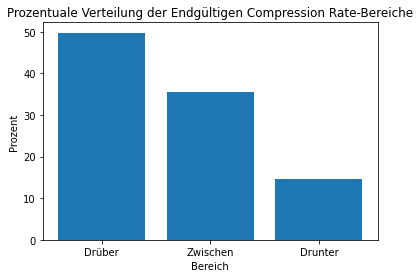

In [100]:
# Spalten extrahieren

endgueltige_kompressionsrate = df['ent_com_rate']
min_kompressionsrate = df['desired_compression_rate'] - 0.05
max_kompressionsrate = df['desired_compression_rate'] + 0.05

# Zeile hinzufügen, um den Bereich zu kennzeichnen
df['Bereich'] = ""
for i in range(len(df)):
    if (endgueltige_kompressionsrate[i] < min_kompressionsrate[i]).any():
        df.at[i, 'Bereich'] = 'Drunter'
    elif ((min_kompressionsrate[i] <= endgueltige_kompressionsrate[i]) & (endgueltige_kompressionsrate[i] <= max_kompressionsrate[i])).any():

        df.at[i, 'Bereich'] = 'Zwischen'
    else:
        df.at[i, 'Bereich'] = 'Drüber'

# Berechne die prozentualen Anteile der Bereiche
counts = df['Bereich'].value_counts(normalize=True) * 100

# Plot: Prozentuale Anteile der Bereiche
plt.bar(counts.index, counts.values)
plt.xlabel('Bereich')
plt.ylabel('Prozent')
plt.title('Prozentuale Verteilung der Endgültigen Compression Rate-Bereiche')
plt.show()

In [137]:
def bar_chart(df,rate):
    endgueltige_kompressionsrate = df['ent_com_rate']
    min_kompressionsrate = df['desired_compression_rate'] - rate
    max_kompressionsrate = df['desired_compression_rate'] + rate

    # Zeile hinzufügen, um den Bereich zu kennzeichnen
    df['Bereich'] = ""
    for i in range(len(df)):
        if (endgueltige_kompressionsrate[i] < min_kompressionsrate[i]).any():
            df.at[i, 'Bereich'] = 'Zu kurz'
        elif ((min_kompressionsrate[i] <= endgueltige_kompressionsrate[i]) & (endgueltige_kompressionsrate[i] <= max_kompressionsrate[i])).any():

            df.at[i, 'Bereich'] = 'Optimal'
        else:
            df.at[i, 'Bereich'] = 'Zu lang'

    # Berechne die prozentualen Anteile der Bereiche
    counts = df['Bereich'].value_counts(normalize=True) * 100

    # Plot: Prozentuale Anteile der Bereiche
    plt.bar(counts.index, counts.values)
    plt.xlabel('Bereich')
    plt.ylabel('Prozent')
    plt.title('Prozentuale Verteilung der Endgültigen Compression Rate-Bereiche')
    plt.show()

In [129]:
science_neu.Bereich.value_counts()

Zwischen    109
Drunter      67
Drüber       24
Name: Bereich, dtype: int64

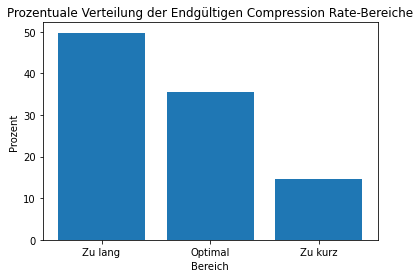

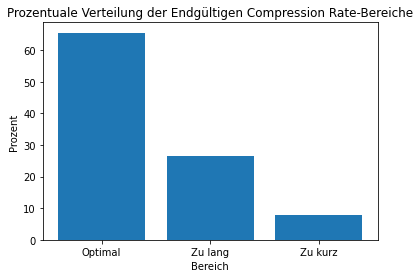

(None, None)

In [138]:
bar_chart(df,0.05), bar_chart(df,0.1)

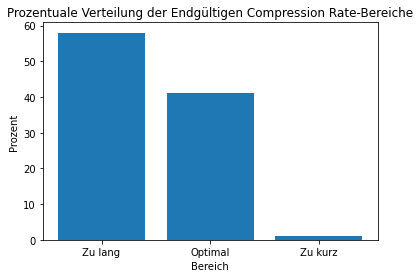

In [136]:
bar_chart(story,0.1)

In [102]:
df.tokens_gesamt.value_counts()

60      59
61      28
59      27
62      19
58      17
        ..
3255     1
4537     1
5966     1
5577     1
1117     1
Name: tokens_gesamt, Length: 508, dtype: int64

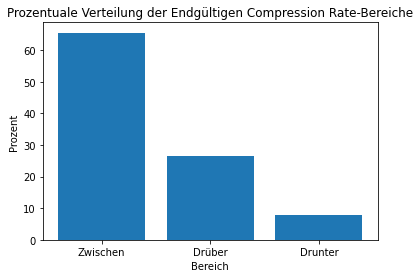

In [76]:
bar_chart(df)

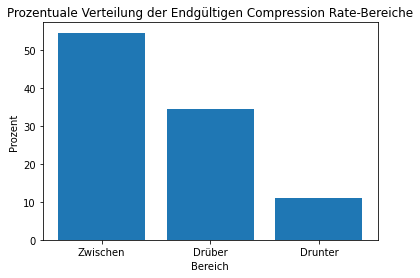

In [71]:
bar_chart(news)

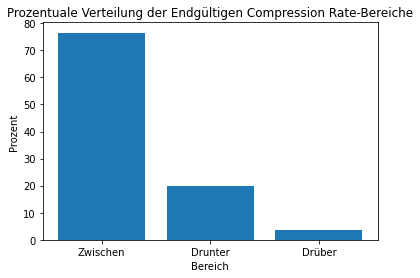

In [84]:
bar_chart(science)

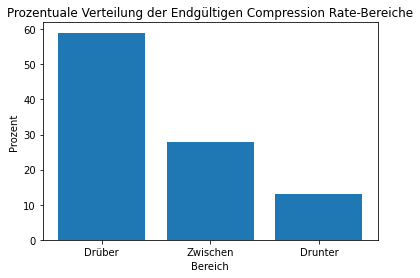

In [73]:
bar_chart(review)

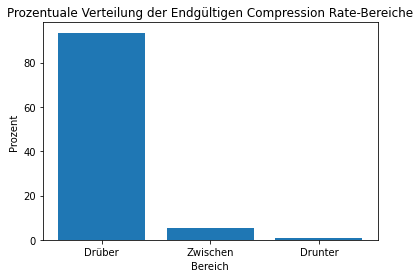

In [74]:
bar_chart(story)

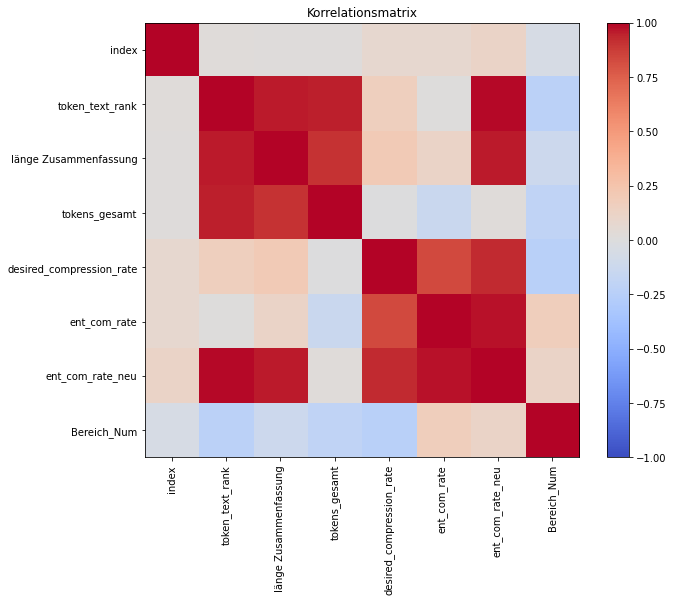

In [31]:
# Spalte "Bereich" in numerische Kategorien umwandeln
df['Bereich_Num'] = df['Bereich'].map({'Drunter': 0, 'Zwischen': 1, 'Drüber': 2})

# Korrelationsmatrix berechnen
correlation_matrix = df.corr()

# Plot: Korrelationsmatrix
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Korrelationsmatrix')
plt.show()

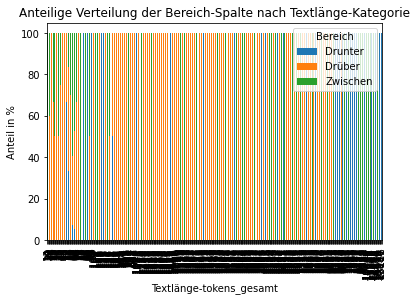

In [106]:
# Textlänge in Kategorien einteilen: lang und kurz
df['Textlänge'] = pd.cut(df['tokens_gesamt'], bins=[0, 250, 1000, 3000, 10000, float('inf')])

# Verteilung der Bereich-Spalte nach Textlänge-Kategorie
verteilung = df.groupby(['tokens_gesamt', 'Bereich'])['Bereich'].count().unstack()

# Anteilswerte berechnen
verteilung_prozent = verteilung.apply(lambda x: x / x.sum() * 100, axis=1)

# Plot: Verteilung der Bereich-Spalte nach Textlänge-Kategorie
verteilung_prozent.plot(kind='bar', stacked=True)
plt.xlabel('Textlänge-tokens_gesamt')
plt.ylabel('Anteil in %')
plt.title('Anteilige Verteilung der Bereich-Spalte nach Textlänge-Kategorie')
plt.legend(title='Bereich')
plt.show()

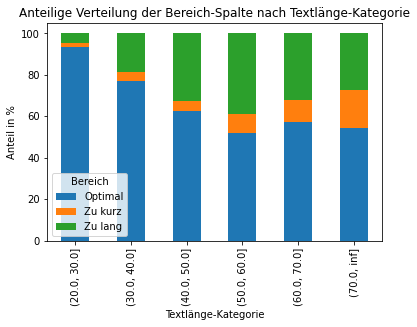

In [144]:
# Textlänge in Kategorien einteilen: lang und kurz
df['Textlänge_Kategorie'] = pd.cut(df['desired_compression_rate']*100, bins=[20, 30,40,50,60,70, float('inf')])

# Verteilung der Bereich-Spalte nach Textlänge-Kategorie
verteilung = df.groupby(['Textlänge_Kategorie', 'Bereich'])['Bereich'].count().unstack()

# Anteilswerte berechnen
verteilung_prozent = verteilung.apply(lambda x: x / x.sum() * 100, axis=1)

# Plot: Verteilung der Bereich-Spalte nach Textlänge-Kategorie
verteilung_prozent.plot(kind='bar', stacked=True)
plt.xlabel('Textlänge-Kategorie')
plt.ylabel('Anteil in %')
plt.title('Anteilige Verteilung der Bereich-Spalte nach Textlänge-Kategorie')
plt.legend(title='Bereich')
plt.show()

In [37]:
# Textlänge in Kategorien einteilen: lang und kurz
df['Textlänge_Kategorie'] = pd.cut(df['Min_Kompressionsrate'], bins=[0, 50, float('inf')], labels=['Kurz', 'Lang'])

# Verteilung der Bereich-Spalte nach Textlänge-Kategorie
verteilung = df.groupby(['Textlänge_Kategorie', 'Bereich'])['Bereich'].count().unstack()

# Anteilswerte berechnen
verteilung_prozent = verteilung.apply(lambda x: x / x.sum() * 100, axis=1)

# Plot: Verteilung der Bereich-Spalte nach Textlänge-Kategorie
verteilung_prozent.plot(kind='bar', stacked=True)
plt.xlabel('Textlänge-Kategorie')
plt.ylabel('Anteil in %')
plt.title('Anteilige Verteilung der Bereich-Spalte nach Textlänge-Kategorie')
plt.legend(title='Bereich')
plt.show()

KeyError: 'Min_Kompressionsrate'

In [139]:
df["Differenz"] = abs(df["ent_com_rate"]*100 - (df["desired_compression_rate"]*100))

In [140]:

mittelwert = df['Differenz'].mean()
standardabweichung = df['Differenz'].std()

# Ausgabe der Ergebnisse
print("Mittelwert:", mittelwert)
print("Standardabweichung:", standardabweichung)


Mittelwert: 8.785667227378928
Standardabweichung: 7.334324271647828


In [111]:
import numpy as np
np.argmax(df["Differenz"])

404

In [117]:
df.loc[404]

index                                                                       4
text_rank_text              What there are in this book are many examples ...
token_text_rank                                                           117
Zusammenfassung             This is not a new bookperhaps thats why it is ...
länge Zusammenfassung                                                     148
text                        This is not a new bookperhaps thats why it is ...
tokens_gesamt                                                             108
desired_compression_rate                                                 0.69
ent_com_rate                                                          1.37037
ent_com_rate_neu                                                          NaN
Bereich                                                                Drüber
Textlänge                                                        (0.0, 250.0]
Differenz                                                       

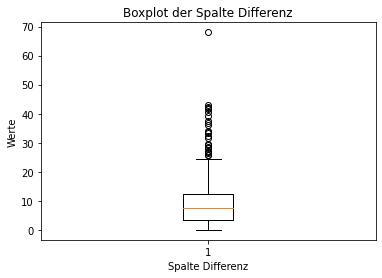

In [109]:
# Annahme: df ist der DataFrame, für den du den Boxplot der Spalte 'Differenz' erstellen möchtest

# Boxplot erstellen
plt.boxplot(df['Differenz'])

# Achsentitel setzen
plt.xlabel('Spalte Differenz')
plt.ylabel('Werte')

# Titel setzen
plt.title('Boxplot der Spalte Differenz')

# Boxplot anzeigen
plt.show()


In [41]:
import math
df["Test"] = (df["tokens_gesamt"]*df["desired_compression_rate"])

In [78]:
df

,Unnamed: 0,text_rank_text,token_text_rank,Zusammenfassung,länge Zusammenfassung,text,tokens_gesamt,desired_compression_rate,ent_com_rate,ent_com_rate_neu,Bereich,Differenz,Test
0,0,RJD Chief Lalu Prasad Yadav on Wednesday said ...,31,RJD Chief Lalu Prasad Yadav on Wednesday said ...,31,RJD Chief Lalu Prasad Yadav on Wednesday said ...,58,0.54,0.534483,0.534483,Zwischen,0.551724,31.32
1,1,The Indira Gandhi International Airport has cl...,30,The Indira Gandhi International Airport has cl...,30,The Indira Gandhi International Airport has cl...,59,0.46,0.508475,0.508475,Zwischen,4.847458,27.14
2,2,"State run buses, school buses, and vehicles us...",34,"State run buses, school buses, and vehicles us...",34,Mumbai Traffic Police have temporarily banned ...,63,0.55,0.539683,0.539683,Zwischen,1.031746,34.65
3,3,Titanic actors Leonardo DiCaprio and Kate Wins...,21,Titanic actors Leonardo DiCaprio and Kate Wins...,21,Titanic actors Leonardo DiCaprio and Kate Wins...,61,0.32,0.344262,0.344262,Zwischen,2.426230,19.52
4,4,A member of Sikh communitys Damdami Taksal sem...,33,A member of Sikh communitys Damdami Taksal sem...,35,A member of Sikh communitys Damdami Taksal sem...,59,0.69,0.593220,0.559322,Drunter,9.677966,40.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,Nine people were killed and 22 injured on Satu...,38,Nine people were killed and 22 injured on Satu...,38,Nine people were killed and 22 injured on Satu...,58,0.63,0.655172,0.655172,Zwischen,2.517241,36.54
196,196,External Affairs Minister Sushma Swaraj had ea...,12,External Affairs Minister Sushma Swaraj had ea...,12,The Union Minister of State for Social Justice...,55,0.24,0.218182,0.218182,Zwischen,2.181818,13.20
197,197,India womens team captain Mithali Raj has beco...,42,India womens team captain Mithali Raj has beco...,42,India womens team captain Mithali Raj has beco...,59,0.71,0.711864,0.711864,Zwischen,0.186441,41.89
198,198,"A class 10 student from Bihar, who got 0 in Ma...",49,"A class 10 student from Bihar, who got 0 in Ma...",49,"A class 10 student from Bihar, who got 0 in Ma...",57,0.70,0.859649,0.859649,Drüber,15.964912,39.90
